We replicate the results in Example 21.15 for the heart disease data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, KFold

In [2]:
from tree import Branch, Leaf, visualise_tree, fit_tree, DecisionTreeModel

In [3]:
data = pd.read_csv('../ch13/coris.csv', index_col=0)
data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0


In [4]:
X = data.drop(columns='chd')
y = data['chd']

### Implementation from first principles

We display the tree from Figure 22.7:

In [5]:
tree = Branch(
    'age',
    31.5,
    Leaf(0),
    Branch(
        'age',
        50.5,
        Branch(
            'typea',
            68.5,
            Leaf(0),
            Leaf(1),
        ),
        Branch(
            'famhist',
            1,
            Branch(
                'tobacco',
                7.605,
                Leaf(0),
                Leaf(1),
            ),
            Leaf(1),
        ),
    ),
)

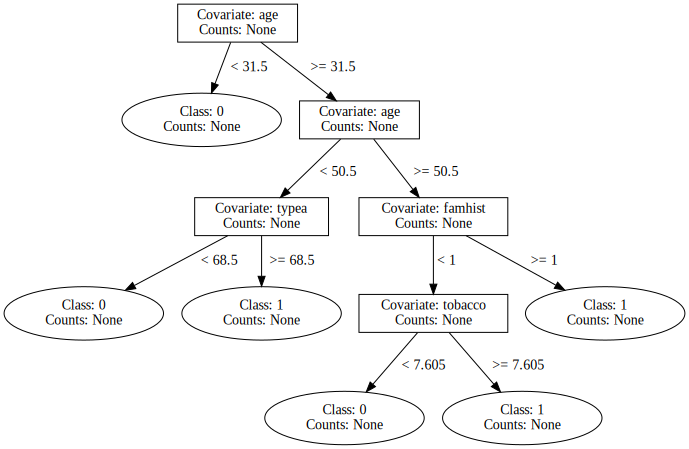

In [6]:
visualise_tree(tree)

We fit a decision tree limiting the number of observations in each leaf:

In [7]:
%%time
tree = fit_tree(y, X, min_leaf_size=60)

CPU times: user 8.52 s, sys: 29.1 ms, total: 8.55 s
Wall time: 8.6 s


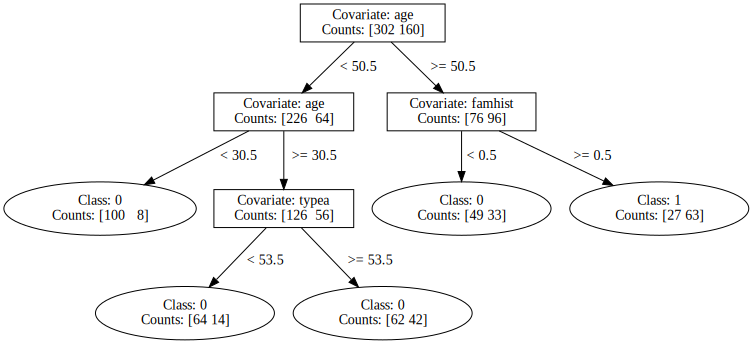

In [8]:
visualise_tree(tree)

In [9]:
K = 10

In [10]:
kf = KFold(n_splits=K)

In [11]:
min_node_sizes = [10, 20, 30, 40, 45, 50, 55, 60, 65, 70, 80, 90, 100]

In [12]:
%%time
err_rates = 1 - np.array([cross_val_score(
    estimator=DecisionTreeModel(min_leaf_size=m),
    X=X,
    y=y,
    cv=kf,
    n_jobs=4,
    scoring='accuracy',
).mean() for m in min_node_sizes])

CPU times: user 899 ms, sys: 310 ms, total: 1.21 s
Wall time: 6min 34s


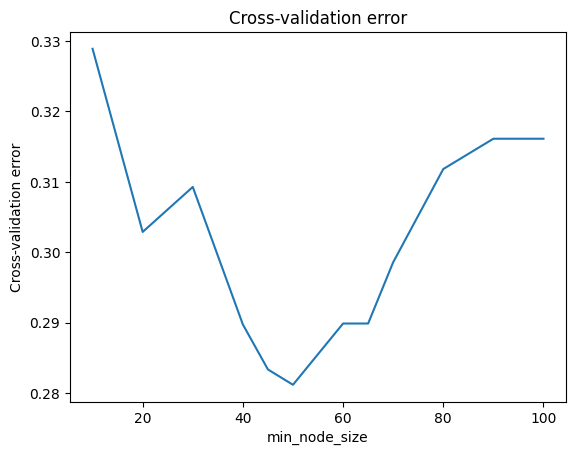

In [13]:
fig, ax = plt.subplots()
ax.plot(min_node_sizes, err_rates);
ax.set_xlabel('min_node_size');
ax.set_ylabel('Cross-validation error');
ax.set_title('Cross-validation error');

The minimum cross-validation error is attained for the parameter value:

In [14]:
m_opt = min_node_sizes[np.argmin(err_rates)]
m_opt

50

CPU times: user 9.97 s, sys: 67.9 ms, total: 10 s
Wall time: 10 s


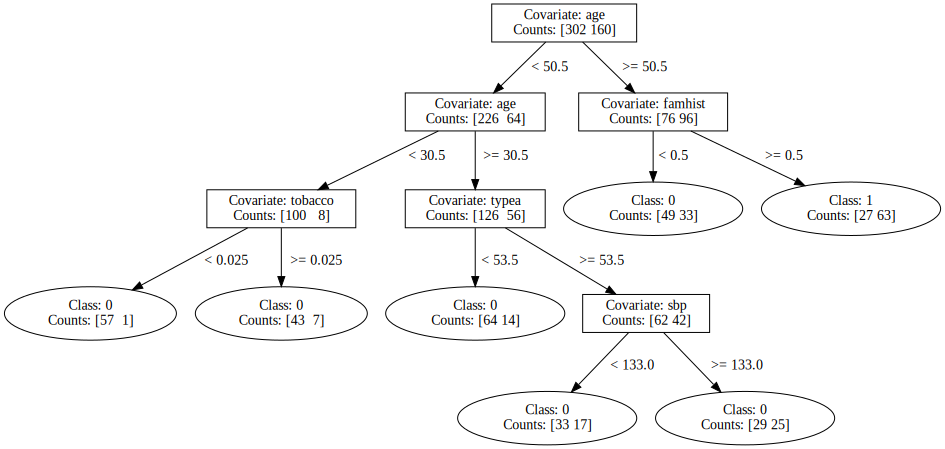

In [15]:
%%time
tree = fit_tree(y, X, min_leaf_size=m_opt)
visualise_tree(tree)

### Scikit-learn implementation

In [16]:
classifier = DecisionTreeClassifier(min_samples_leaf=m_opt).fit(X, y)

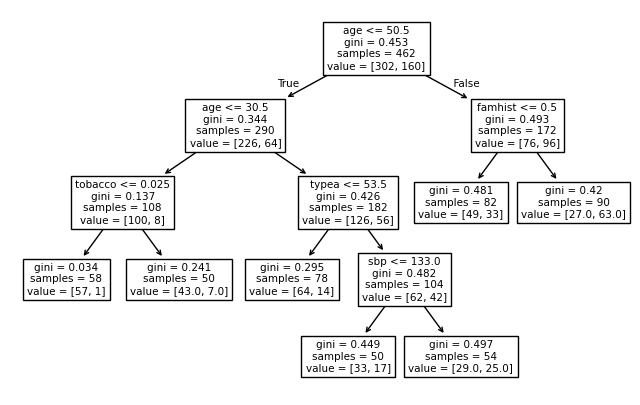

In [17]:
fig, ax = plt.subplots(figsize=(8, 5))
plot_tree(classifier, feature_names=X.columns, ax=ax);

The predicted labes match our implementation:

In [18]:
np.testing.assert_equal(classifier.predict(X), X.apply(tree.predict, axis=1))

We can also perform cross-validation:

In [19]:
%%time
err_rates = 1 - np.array([cross_val_score(
    estimator=DecisionTreeClassifier(min_samples_leaf=m),
    X=X,
    y=y,
    cv=kf,
    n_jobs=4,
    scoring='accuracy',
).mean() for m in min_node_sizes])

CPU times: user 163 ms, sys: 15.5 ms, total: 179 ms
Wall time: 501 ms


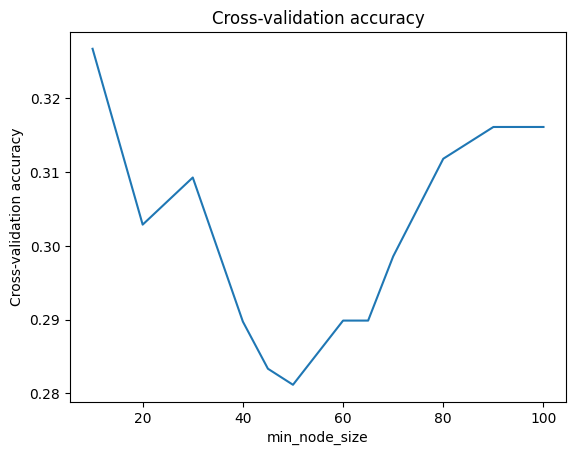

In [20]:
fig, ax = plt.subplots()
ax.plot(min_node_sizes, err_rates);
ax.set_xlabel('min_node_size');
ax.set_ylabel('Cross-validation accuracy');
ax.set_title('Cross-validation accuracy');

The maximum accuracy is achieved for

In [21]:
min_node_sizes[np.argmin(err_rates)]

50